In [1]:
# Test 2
from math import gcd
    
def get_shape(n, min_gcd, n_offset = 1):
    points = [(0,0)]
    for i in range(n):
        f = gcd(abs(i), abs(n-i))
        if f <= min_gcd:
            continue
        v = (i/f , (n-i)/f)
        next_point = (int(points[-1][0]+v[0]), int(points[-1][1] + v[1]))
        points.append(next_point)
    total_points = len(points)
    
    for i in range(3*total_points-4):
        p0 = points[-total_points]
        p1 = points[1-total_points]
        v = (p1[0]-p0[0], p1[1]-p0[1])
        next_point = (points[-1][0]+v[1], int(points[-1][1]-v[0]))
        points.append(next_point)
    return points
def doublearea(points):
    return sum(p2[0]*p1[1]-p2[1]*p1[0] for p1,p2 in zip(points[1:], points[2:]))

In [2]:
def get_shape(n, remove):
    vectors = []
    lengths = []
    for i in range(n):
        f = gcd(i, n-i)
        vectors.append((i//f , (n-i)//f))
        lengths.append((i//f)**2 + ((n-i)//f)**2)
    for i in range(remove):
        index = lengths.index(max(lengths))
        del lengths[index]
        del vectors[index]
        
    points = [(0,0)]
    for v in vectors:
        next_point = (int(points[-1][0]+v[0]), int(points[-1][1] + v[1]))
        points.append(next_point)
    
    total_points = len(points)
    for i in range(3*total_points-4):
        p0 = points[-total_points]
        p1 = points[1-total_points]
        v = (p1[0]-p0[0], p1[1]-p0[1])
        next_point = (points[-1][0]+v[1], int(points[-1][1]-v[0]))
        points.append(next_point)
    return points

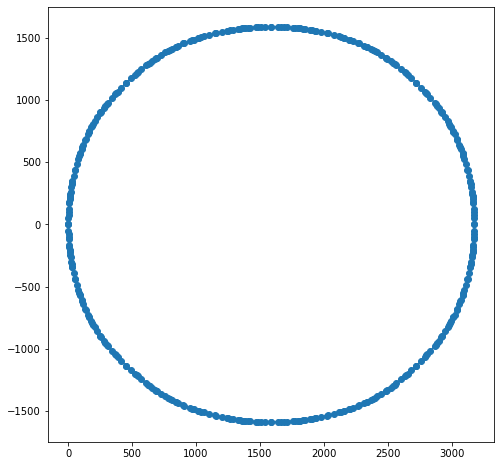

400
16118078


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
shape = get_shape(300,200)
i,j = zip(*shape)
i = list(i) + [i[0]]
j = list(j) + [j[0]]
plt.plot(i,j)
plt.scatter(i,j)
plt.show()
print(len(shape))
print(doublearea(shape))

In [4]:
lenghts = []
areas = []

for n in range(1,400):
    for remove in range(0,n):
        shape = get_shape(n, remove)
        lenghts.append(len(shape))
        areas.append(doublearea(shape))

In [5]:
length_area_dict= {}
for l,a in zip(lenghts, areas):
    if l not in length_area_dict:
        length_area_dict[l] = a
    else:
        if a < length_area_dict[l]:
            length_area_dict[l] = a
            
length_area_dict = dict(sorted(length_area_dict.items(), reverse=True))

In [6]:
best_values = [1, 2, 5, 6, 13, 14, 21, 28, 43, 48, 65, 80, 103, 118, 151, 174, 213, 242, 289, 328, 387, 420, 497, 548]

In [7]:
#from https://gist.github.com/AlephAlpha/7d09076ed6a781ff82ff520280560db7
best_values += [625, 690, 783, 860, 967, 1046, 1177, 1264, 1409, 1498, 1671]

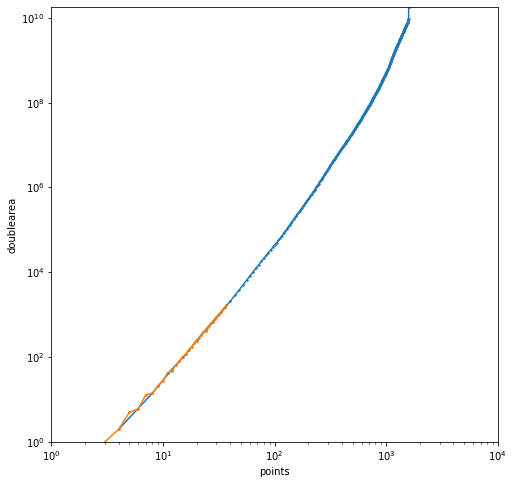

In [8]:
xlimit = 10000
plt.plot(*zip(*length_area_dict.items()))
plt.scatter(*zip(*length_area_dict.items()), s=2)
plt.plot(range(3,len(best_values)+3), best_values)
plt.scatter(range(3,len(best_values)+3), best_values, s=3)
plt.xlabel('points')
plt.ylabel('doublearea')
plt.loglog()
plt.xlim([1,xlimit])
plt.ylim([1,max(area for length, area in length_area_dict.items() if length <= xlimit)])
plt.show()

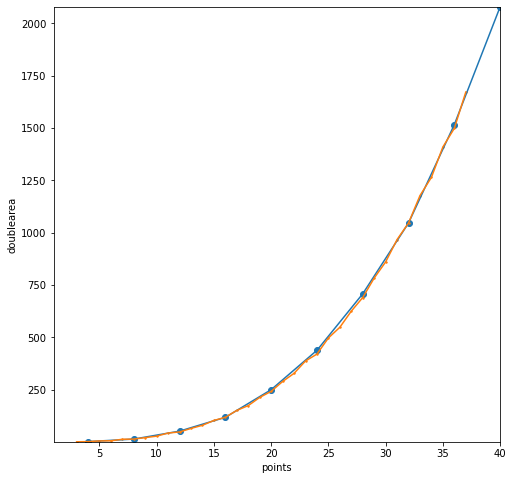

In [9]:
xlimit = 40
plt.plot(*zip(*length_area_dict.items()))
plt.scatter(*zip(*length_area_dict.items()))
plt.plot(range(3,len(best_values)+3), best_values)
plt.scatter(range(3,len(best_values)+3), best_values, s=2)
plt.xlabel('points')
plt.ylabel('doublearea')
plt.xlim([1,xlimit])
plt.ylim([1,max(area for length, area in length_area_dict.items() if length <= xlimit)])
plt.show()

In [10]:
#Errors
for i in length_area_dict:
    if i - 3 < len(best_values):
        print("points", i, "optimal area", best_values[i-3], "circle area", length_area_dict[i], "percentage worse", round(100*length_area_dict[i]/best_values[i-3] - 100, 4))

points 36 optimal area 1498 circle area 1516 percentage worse 1.2016
points 32 optimal area 1046 circle area 1046 percentage worse 0.0
points 28 optimal area 690 circle area 708 percentage worse 2.6087
points 24 optimal area 420 circle area 438 percentage worse 4.2857
points 20 optimal area 242 circle area 250 percentage worse 3.3058
points 16 optimal area 118 circle area 118 percentage worse 0.0
points 12 optimal area 48 circle area 52 percentage worse 8.3333
points 8 optimal area 14 circle area 14 percentage worse 0.0
points 4 optimal area 2 circle area 2 percentage worse 0.0
